# Analysis of Qualities of Anime
### Spring 2024 Data Science Project

Ryan Jiang and Chukwubuike Peterson

### 1. Introduction

Japanese animation, or anime, has transcended boundaries and exploded in popularity in recent years. Once a niche interest in the West, a 2023 survey reveals a dedicated viewership: [25% of Millennials and a staggering 42% of Gen Zs watch anime weekly](https://www.polygon.com/c/2024/1/22/24034466/anime-viewer-survey-research). This trend aligns with projections of the anime industry reaching a massive [$62.7 billion by 2032](https://finance.yahoo.com/news/anime-market-reach-usd-62-120000412.html). Anime's cultural impact extends beyond viewership - celebrities and artists openly reference it, further solidifying its place in popular culture. However, popularity paints an incomplete picture. As anime embeds itself within the next generation's cultural landscape, a critical data gap emerges. This has sparked an interest in answering the question: What makes anime appeal with viewers? 
    
Specifically recognizing that fan preferences constantly evolve, we want to know past trends and also predict what qualities resonate with viewers. Essentially, this study seeks to anticipate what stories and styles will capture audiences in this ever-evolving landscape of anime. Further analysis can reveal hidden connections between genres and popularity and can be leveraged to know which contents are more likely to be successful. Combining these findings from quantitative research with external qualitative research can offer a more complete understanding of anime's impact and its influence within society. Overall, this study will attempt to uncover any relationships between variables of anime and other factors. 

### 2. DATA PROCESSING:

The initial stage of our process involves searching online for relevant data on anime and we primarily focused on obtaining information on [Kaggle](www.kaggle.com), a website which had a plethora of free and public datasets. Fortunately, we managed to discover a [relevant anime dataset](https://www.kaggle.com/datasets/arnavvvvv/anime-dataset) which had scraped data from MyAnimeList, a popular anime forum and review site. This dataset includes valuable information about each individual anime series such as the period in which it aired, how many episodes, the general sentiment and ranking, and also the genres. 


In [56]:
import pandas as pd
df = pd.read_csv("animes.csv")

Before we can actually analyze the data, we first must clean and process it into a format that will allows us to easily access the data points. We removed potential duplicates because when we first scanned the data, we noticed that there could have been anime that were scraped twice. All of the data columns were string types when the csv file was initally read, so we had to convert them into the appropiate type. 

We first changed the type of the 'members' and 'popularity' columns into integers. We then converted the string in the 'genre' column back into string arrays, so we can analyze it later. We also dropped the link and image url column because we will not be using them as it they are either inaccessible or not relevant. 

Finally, we realized that the format for 'aired' column was inconsistent due to it originally being a string that comprises of two dates. However, this leads to the problem where some animes only aired for a single day and some of the dates were missing either the day or month. In order to remedy this, we are only going to check when the anime first aired. We also will use regex to check every date and if it is missing, we will be adding in missing numbers by adding '1' for missing day and 'January' for missing month. We then converted all of the columns into datetime type so we can compare and filter it later. 

At the very end, we also removed any rows which had empty slots for information. We also purposefully replaced empty summary entries with a singular space since we might later need to count the frequency of certain words in the synposis. After this, we have basically cleaned our data and it is ready for the next step.  

In [57]:
import matplotlib.pyplot as plt
import scipy
import re
# Remove duplicates
df = df.drop_duplicates()
# changing columns types from string to int
df['members'] = df['members'].astype(int)
df['popularity'] = df['popularity'].astype(int)
# changing string back into string array with each genre being its own element in array
df['genre'] = df['genre'].apply(eval)
#dropping the image url and link from table since it won't be needed
df = df.drop('img_url', axis=1)
df = df.drop('link', axis=1)
# converting string into two dates and only getting the first date
df['aired'] = df['aired'].str.split(' to ').str[0]
#function that will format the string into a datetime object to be comparable, also adds in missing data if missing month and or day.
def parse_date(date_str):
    formats = [r'^\w+ \d+\, \d{4}$', r'^\w+ \d{4}$', r'^\d{4}$']
    for fmt in formats:
      x = re.search(fmt, date_str)
      if (x):
        x = str(x.group())
        if fmt == r'^\w+ \d{4}$':
          x = x.replace(" ", " 1, ")
        elif fmt == r'^\d{4}$':
          x = "January 1, "+ x
      return pd.to_datetime(x)
    return pd.NaT
df['aired'] = df['aired'].apply(parse_date)
df['synopsis'] = df['synopsis'].fillna(' ')
df = df.dropna()
display(df)

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"[Comedy, Sports, Drama, School, Shounen]",2015-10-04,25.0,489888,141,25.0,8.82
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"[Drama, Music, Romance, School, Shounen]",2014-10-10,22.0,995473,28,24.0,8.83
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"[Sci-Fi, Adventure, Mystery, Drama, Fantasy]",2017-07-07,13.0,581663,98,23.0,8.83
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","[Action, Military, Adventure, Comedy, Drama, M...",2009-04-05,64.0,1615084,4,1.0,9.23
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"[Action, Mystery, Supernatural, Vampire]",2017-01-06,1.0,214621,502,22.0,8.83
...,...,...,...,...,...,...,...,...,...,...
19002,10075,Naruto x UT,All-new animation offered throughout UNIQLO cl...,"[Action, Comedy, Super Power, Martial Arts, Sh...",2011-01-01,1.0,34155,2382,1728.0,7.50
19003,35828,Miira no Kaikata,High school student Sora Kashiwagi is accustom...,"[Slice of Life, Comedy, Supernatural]",2018-01-12,12.0,61459,1648,1727.0,7.50
19004,10378,Shinryaku!? Ika Musume,"After regaining her squid-like abilities, Ika ...","[Slice of Life, Comedy, Shounen]",2011-09-27,12.0,67422,1547,1548.0,7.56
19005,33082,Kingsglaive: Final Fantasy XV,"For years, the Niflheim Empire and the kingdom...",[Action],2016-07-09,1.0,41077,2154,1544.0,7.56


### 3. Exploratory data analysis

Before we undergo creating a model for predicting, we should first get a big picture of the data. This will involve performing statistical analysis in order to understand how the variables relate with each other. 

The first thing that we will perform is a Z-Test in order to understand if there could be correlations between audience rating and if an anime is a specific genre. We hypothesize that anime with the 'action' genre tag would perform much better. We perform a Z test to see if the average score for animes with the Action genre is greater then 7
- Z-Test Hypothesis:
- HA: The mean score of Anime with "Action" genre will be greater or equal to 7  
- H0: The mean score of Anime with "Action" genre will be less than 7
 

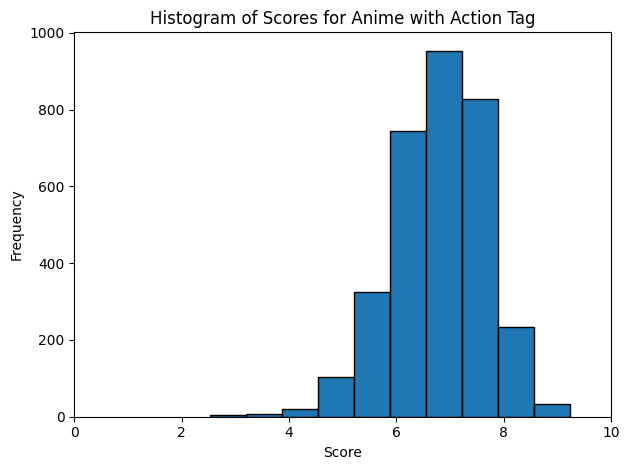

Median score of Action entries: 6.83
Estimated p-value (One-tailed test): 0.40276963980290836
The result is not statistically significant (fail to reject null hypothesis).


In [74]:
#getting anime with genre tag
action_entries = df[df['genre'].apply(lambda x: 'Action' in x)]
# calculating mean and standard deviation for use in z test
mean = action_entries['score'].mean()
std_dev = action_entries['score'].std()
# formatting graph.
plt.hist(action_entries['score'], bins=10, edgecolor='black')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Histogram of Scores for Anime with Action Tag')
plt.xlim(0, 10)
plt.tight_layout()
plt.show()
# median used because graph is skewed
median_score = action_entries['score'].median()
print("Median score of Action entries:", median_score)
#hypothesis score
score_value = 7
#z test and p value
z_score = (score_value - mean) / std_dev
p_value = 1 - scipy.stats.norm.cdf(z_score)
print("Estimated p-value (One-tailed test):", p_value)
#prints results of p_value and hypothesis testing
if p_value < 0.05:
    print("The result is statistically significant (reject null hypothesis).")
else:
    print("The result is not statistically significant (fail to reject null hypothesis).")


Since the graph is skewed, we can use the median as an indicator, and the median of every Action anime's score is 6.88 which is below 7. We also look at the p-value and since it is above 0.05, we fail to reject the null hypothesis. This means that our hypothesis is likely not supported by the data and that we will have to perhaps introduce more variables to test out further relationships. 

We also want to glimpse at the potential behavior of viewers of anime in general, specifically looking at the trends in the score in total. We will conduct a boxplot to see if we have any outliers in our data when it comes to scores of anime.

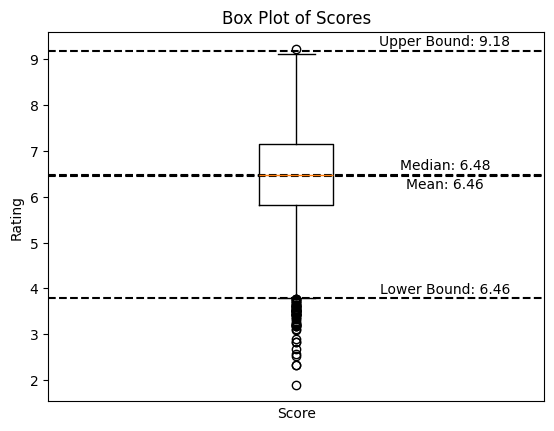

Number of upper outliers: 1
Number of lower outliers: 61


In [64]:
#creating boxplot
score_data = df['score']
plt.boxplot(score_data)
plt.xlabel('Score')
plt.ylabel('Rating')
plt.title('Box Plot of Scores')
plt.xticks([])
#getting the mean, min, and max then displaying it
mean_score = score_data.mean()
min_score = score_data.min()
max_score = score_data.max()
q1 = score_data.quantile(0.25)
q3 = score_data.quantile(0.75)
q2 = score_data.quantile(0.5)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
plt.text(1.3, mean_score-0.2, f"Mean: {mean_score:.2f}", ha='center', 
va='center')
plt.text(1.3, upper_bound+0.2, f"Upper Bound: {upper_bound:.2f}", ha='center', 
va='center')
plt.text(1.3, lower_bound+0.2, f"Lower Bound: {mean_score:.2f}", ha='center', 
va='center')
plt.axhline(y=lower_bound, color='black', linestyle='dashed', label='Lower Bound')
plt.axhline(y=upper_bound, color='black', linestyle='dashed', label='Upper Bound')
plt.axhline(y=mean_score, color='black', linestyle='dashed', label='Mean')
# getting median to compare with mean later
plt.text(1.3, q2+0.2, f"Median: {q2:.2f}", ha='center', 
va='center')
plt.axhline(y=q2, color='black', linestyle='dashed', label='q2')

plt.show()
# seeing how many outliers there are, and what type they are
lower_outliers = df[df['score'] < lower_bound].shape[0]
upper_outliers = df[df['score'] > upper_bound].shape[0]
print(f"Number of upper outliers: {upper_outliers}")
print(f"Number of lower outliers: {lower_outliers}")


There are 62 lower outliers when it comes to score of anime and one higher outlier, suggesting that anime is generally well received and when there are outliers or bad anime, it is a noticable exception. In general, we can see that almost all of the scores fall roughly between 6.5 and 9.2. We also can see that the median and mean are almost the same, meaning that the scores when plotted can be either a normal or uniform distribution. However, when we plot the score as a histogram, we can get a normal distribution that is shifted to the right, but that still means that it is skewed to the left by a bit. 

Text(0, 0.5, 'Frequency')

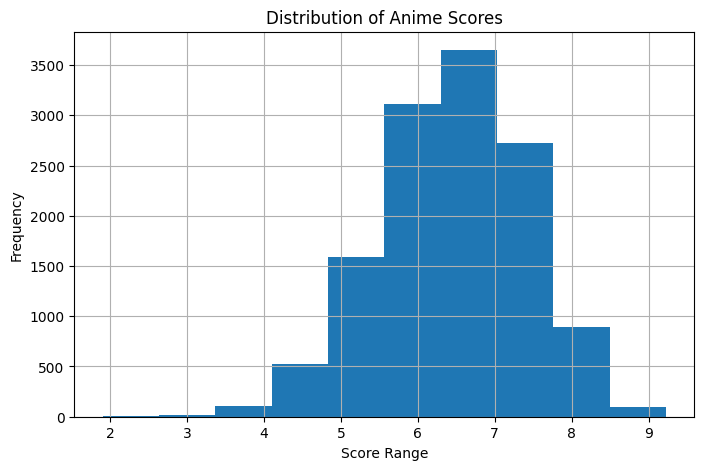

In [73]:
df['score'].hist( bins=10, figsize=(8, 5))
plt.title("Distribution of Anime Scores")
plt.xlabel("Score Range")
plt.ylabel("Frequency")


We also wanted to take a cursory look at the top 100 anime and see which genre occurs the most out of all of them. We were curious if there was certain genres which correlate to a higher rank of an anime. It is important to note that score and rank are different since the lower the rank, the better it is considered, and also each rank are matched one-to-one with an anime. 

After doing a bar chart of the frequency of the appearance of genres within the top 100 anime, we discovered that the most common genre amongst the top 100 ranked animes is 'Drama' with 50 entries, followed by 'Action' tied for second with 46, and 'Comedy' and 'Shounen' being tied for third. 


{'Action': 39, 'Military': 6, 'Adventure': 22, 'Comedy': 44, 'Drama': 47, 'Magic': 4, 'Fantasy': 19, 'Shounen': 40, 'Thriller': 7, 'Sci-Fi': 27, 'Super Power': 8, 'Romance': 13, 'Supernatural': 36, 'School': 17, 'Mystery': 21, 'Historical': 24, 'Parody': 12, 'Samurai': 12, 'Space': 3, 'Game': 2, 'Seinen': 13, 'Slice of Life': 23, 'Sports': 9, 'Mecha': 6, 'Vampire': 5, 'Demons': 6, 'Music': 1, 'Josei': 2, 'Martial Arts': 1, 'Horror': 2, 'Police': 3, 'Psychological': 7, 'Shoujo': 5, 'Dementia': 1}


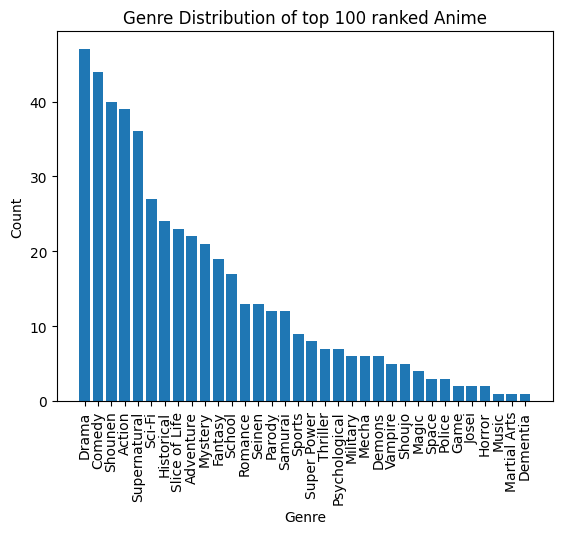

In [77]:
#getting top 100 rank by getting the lowest int values. 
lowest_ranked = df.nsmallest(100, 'ranked')
# iterating to count the genres, uses a dictionary to do so
genre_counts = {}
for genres in lowest_ranked['genre']:
  for genre in genres:
    if genre in genre_counts:
      genre_counts[genre] += 1
    else:
      genre_counts[genre] = 1
print(genre_counts)

#converts dictionary into list which can be used for plotting
sorted_genres = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)
genre_names, genre_counts = zip(*sorted_genres)

# Creates a bar chart
plt.bar(genre_names, genre_counts)
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Genre Distribution of top 100 ranked Anime")
plt.xticks(rotation=90) 

plt.show()

### Conclusion from our preliminary analysis:

We tried a z-test for the first test and it was inconclusive, suggesting that for certain genres such as 'action', there might not be a straight forward correlation between it and scores. 
Looking at the second tests, we can see that the scores of the animes are distibuted skewed to the left. This means that we might need to use logarithmic functions later on in order to correct it for predictions. We also took a look at ranks and genre and noticed that certain genres are represented more when it comes to the more popular anime. Overall, we can conclude that there is a potential to see popularity, comprised of rank and/or score, match up with genre. 